# Проект: Статистический анализ данных

    Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках.

**Цель исследования:** 

    Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Ход исследования:**

    Нам предоставили 3 таблицы: информация о пользователях, информация о поездках и информация о подписках. Для начала загрузим данные, предобработаем и проанализируем их на наличие пропусков и дубликатов.

    На следующем шаге мы объединим таблицы в одну и выделим еще две таблицы: с информацией о поездках пользователей с подпиской и информацией о поездках пользователей без подписки

    После чего подсчитаем выручку, которую принес каждый пользователь за каждый месяц.    

    И на последнем шаге проверим некоторые гипотезы, после чего сделаем общий вывод.

# Приступим к работе.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')


In [3]:
display(users_go)
display(rides_go)
display(subscriptions_go)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**1.1 Изучим информацию о датафреймах**

In [4]:
print(users_go.info())
print(rides_go.info())
print(subscriptions_go.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns)

**1.2 Найдем явные дубликаты**

In [5]:
print('Количество явных дубликатов в users_go = ', users_go.duplicated().sum())
print('Количество явных дубликатов в rides_go = ', rides_go.duplicated().sum())

Количество явных дубликатов в users_go =  31
Количество явных дубликатов в rides_go =  0


**1.3 И построим гистограммы для столбцов *age, distance, duration и date***

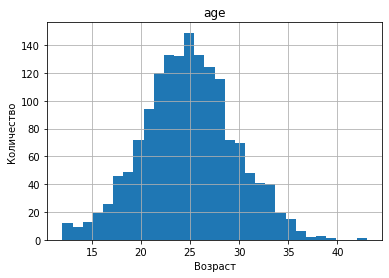

In [6]:
users_go['age'].hist(bins=30)
plt.title('age')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

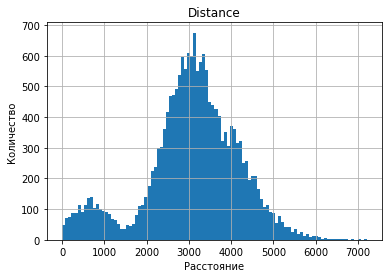

In [7]:
rides_go['distance'].hist(bins=100)
plt.title('Distance')
plt.xlabel('Расстояние')
plt.ylabel('Количество')
plt.show()

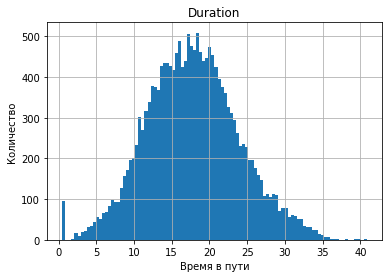

In [8]:
rides_go['duration'].hist(bins=100)
plt.title('Duration')
plt.xlabel('Время в пути')
plt.ylabel('Количество')
plt.show()

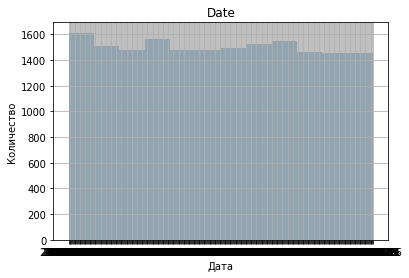

In [9]:
rides_go['date'].hist(bins=12)
plt.title('Date')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

**Вывод:**



В датасете ***users_go*** 1565 записей. Пропуски отсутствуют и 31 явных дубликатов.
По гистограмме стобца ***age*** мы видим, что пиковым значением является возраст 25 лет, в основном самокатами пользуются люди от 20 до 30 лет.

В датасете ***rides_go*** 18068 записей. Пропуски отсутствуют, явные дубликаты тоже. По гистограммам мы видим следующее:

1. Среднее расстояние, пройденное на самокате - 3000 метров = 3км. Максимальным расстоянием будет чуть больше 7км. 


2. Среднее время пользования самокатом - 18 минут. Максимальное - 40 минут. Мы видим скачок значений около ноля, как и на гистограмме столбца ***distance***, скорее всего это техническая неисправность самоката: начал поездку, заметил, например, спущенное колесо и поставил обратно.

Для датасета ***subscriptions_go*** нет смысла строить гистограмму или искать дубликаты, а пропусков в нём нет.

#### Шаг 2. Предобработка данных

**2.1 Удалим явные дубликаты в  датафрейме *users_go***

In [10]:
users_go = users_go.drop_duplicates()
print(users_go.duplicated().sum())

0


**2.2 Округлим значения в стобцах *distance* и *duration* датафрейма *rides_go*.**

In [11]:
rides_go['distance'] = rides_go['distance'].round(2)
rides_go['duration'] = np.ceil(rides_go['duration']) 

**2.3 Приведем столбец *date* к формату даты pandas и создадим новый столбец на основе столбца *date***

In [12]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

In [13]:
rides_go['month'] = rides_go['date'].dt.month

**Вывод:**  
Мы удалили явные дубликаты в датафрейме *users_go*. 

Окгрулили значения в столбцах *distance* и *duration* датафрейма *rides_go*. 

Привели столбец *date* к формату даты *pandas* и создали новый столбец.

#### Шаг 3. Исследовательский анализ данных

**3.1 Визуализируем частоту встречаемости городов**

                user_id
city                   
Пятигорск           219
Екатеринбург        204
Ростов-на-Дону      198
Краснодар           193
Сочи                189
Омск                183
Тюмень              180
Москва              168


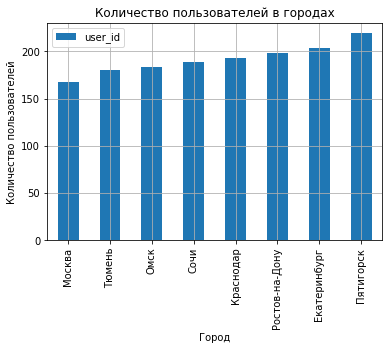

In [14]:
print(users_go.pivot_table(index=['city'], values=['user_id'], aggfunc='count').sort_values(by='user_id', ascending=False))
(
    users_go.pivot_table(index=['city'], values=['user_id'], aggfunc='count')
    .sort_values(by='user_id')
    .plot(kind='bar', grid=True, )
)
plt.title('Количество пользователей в городах')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:**

В ходе исследования мы выяснили, что в тройке лидеров находятся Пятигорск, Екатеринбург и Ростов-на-Дону. На последнем месте Москва.

**3.2 Исследуем соотношение пользователей с подпиской и без подписки**

                   user_id
subscription_type         
free                   835
ultra                  699


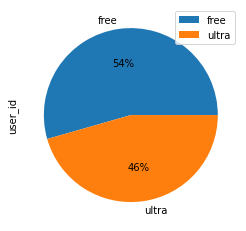

In [15]:
print(users_go.pivot_table(index=['subscription_type'], values=['user_id'], aggfunc='count'))
(
    users_go.pivot_table(index=['subscription_type'], values=['user_id'], aggfunc='count')
    .plot(kind='pie', y='user_id', autopct='%1.0f%%')
)
plt.show()

**Вывод:**

Количество пользователей без подписки - 835 (54%), превышает количество пользователей с подпиской - 699 (46%).

**3.3 Исследуем возраст пользователей.**

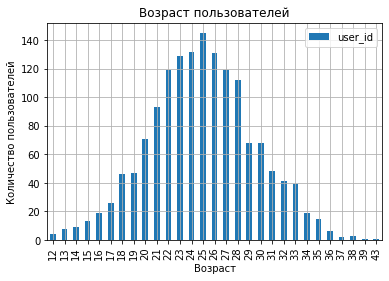

In [16]:
(
    users_go.pivot_table(index=['age'], values=['user_id'], aggfunc='count')
    .sort_values(by=['age'], ascending=True)
    .plot(kind='bar', grid=True)
)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()


**Вывод:**

Средний возраст пользователей - 25 лет. Количество пользователей старше и младше двадцати пяти равномерно уменьшается.

**3.4 Исследуем расстояние, которое пользователь преодолел за одну поездку**

In [17]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

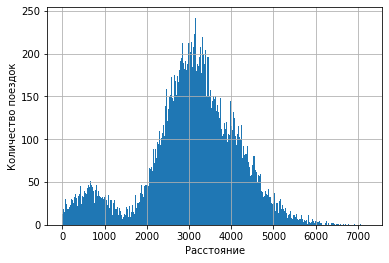

In [18]:
rides_go['distance'].hist(bins=300, range=(0, 7211))
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()

**Вывод:**

Как и говорили ранее, в среднем люди проезжаюь от 2543 до 3776 метров - это первый и третий квартили соответственно. Пик приходится на 3133 метров - второй квартиль.

**3.5 Исследуем продолжительность поездок.**

In [19]:
rides_go['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

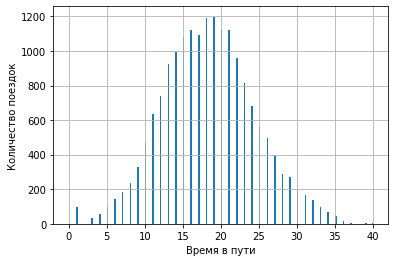

In [20]:
rides_go['duration'].hist(bins=200, range=(0, 40))
plt.xlabel('Время в пути')
plt.ylabel('Количество поездок') 
plt.show()                         

**Вывод:**

Среднее время в пути составляет 17.8 минут, но опять же видим всплеск около нуля, начали поздку и сразу закончили?

**Общий вывод по разделу:**

1. Больше всего пользователей встречаются в Пятигорске, Екатеринбурге и Ростове-на-Дону. Москва занимает последнее место.

2. Пользователей без подписки больше, чем пользователей с подпиской, но разница небольшая, я думал, что она будет существеннее.

3. Самокатами в основном пользуются люди 25лет +-5 лет.

4. И проезжают 3 километра за 18 минут.

#### Шаг 4. Объединение данных

**4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм.**

In [21]:
users_go.shape[0]

1534

In [22]:
rides_go.shape[0]

18068

In [23]:
subscriptions_go.shape[0]

2

In [24]:
general_df = users_go.merge(rides_go, on='user_id')
general_df = general_df.merge(subscriptions_go, on='subscription_type')

In [25]:
general_df.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.89,17.0,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.02,15.0,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.12,24.0,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.69,16.0,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.69,16.0,2021-11-22,11,6,0,199


In [26]:
general_df.duplicated().sum()

0

In [27]:
general_df = general_df.drop_duplicates()

In [28]:
general_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


**4.2 Создадим еще два датафрейма: с данными о пользователях с подпиской и с данными о пользователях без подписки.**

In [29]:
subscription_free = general_df[general_df['subscription_type']=='free']

In [30]:
subscription_ultra = general_df[general_df['subscription_type']=='ultra']


In [31]:
display(general_df)
display(subscription_free)
display(subscription_ultra)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,17.0,2021-11-27,11,8,50,0


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,18.0,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,17.0,2021-11-27,11,8,50,0


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.05,25.0,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.70,16.0,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.16,15.0,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.85,16.0,2021-10-17,10,6,0,199


In [32]:
general_df.shape[0]

18068

In [33]:
len(subscription_free) + len(subscription_ultra)

18068

**4.3 Визуализируем информацию о расстоянии и времени поездок**

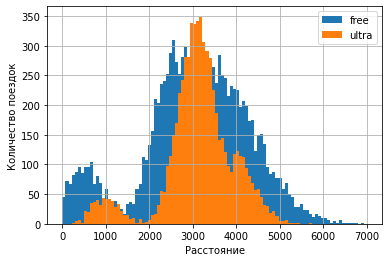

In [34]:
subscription_free['distance'].hist(bins=100, range=(1, 7000), label='free')
subscription_ultra['distance'].hist(bins=100, range=(1, 7000), label='ultra')
plt.legend()
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()

In [35]:
subscription_free['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

In [36]:
subscription_ultra['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

**Вывод:**

После визуализации данных мы видим, что подписка влияет на стандартное отклонение (у subscription_ultra оно ниже), а так же на медианное значение. Пользователи без подписки в среднем проезжаюь 3045.5 метров, тогда как пользователи с подпиской - 3115.5 метров. На обеих гистограммах мы видим пики около нуля, мне кажется, что это неисправность самокатов: поехал, обнаружил неисправность, поставил через несколько метров.

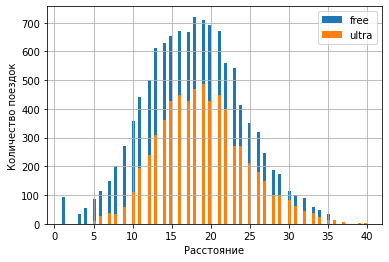

In [37]:
subscription_free['duration'].hist(bins=100, range=(1, 40), label='free')
subscription_ultra['duration'].hist(bins=100, range=(1, 40), label='ultra')
plt.legend()
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()

In [38]:
subscription_free['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

In [39]:
subscription_ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

**Вывод:**

Анализируя время поездки, мы так же видим, что наличие подписки влияет и на среднее, и на медианное значение - у подписки ультра эти показатели выше, а стандартное отклонение снова меньше.

**Общий вывод по разделу:**

Объединив три данные нам таблицы в одну общую и визуализировав последнюю, мы выяснили, что имеющаяся подписка влияет и на расстояние, преодоленное на самокате, и на время пользования.

#### Шаг 5. Подсчёт выручки

**5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

In [40]:
users_income = general_df.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc=({'distance':{'count', 'sum'}, 
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',})
)
users_income.columns = [
    'count', 'distance', 
    'duration', 
    'minute_price',
    'start_ride_price', 
    'subscription_fee'
]
users_income.head(10)

count  distance  duration  minute_price  start_ride_price  \
user_id month                                                              
1       1          2   7027.51      42.0             6                 0   
        4          1    754.16       7.0             6                 0   
        8          2   6723.47      46.0             6                 0   
        10         2   5809.91      32.0             6                 0   
        11         3   7003.50      56.0             6                 0   
        12         2   6751.63      28.0             6                 0   
2       3          3  10187.73      63.0             6                 0   
        4          2   6164.39      40.0             6                 0   
        6          1   3255.34      14.0             6                 0   
        7          2   6780.73      48.0             6                 0   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199  
        12                  199  
2       3                   199  
        4                   199  
        6                   199  
        7                   199

In [41]:
users_income.isna().sum()

count               0
distance            0
duration            0
minute_price        0
start_ride_price    0
subscription_fee    0
dtype: int64

**5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.** 

Чтобы найти выручку за месяц, нам нужно сложить: 

1. произведение ***стоимости начала поездки*** и ***количества поездок***

2. произведение ***стоимости одной минуты*** и ***продолжительности поездки***

3. ***стоимость ежемесячного платежа***

In [42]:
users_income['income'] = users_income['start_ride_price'] * users_income['count'] + users_income['minute_price'] * users_income['duration'] + users_income['subscription_fee']
users_income['income']
print(users_income['income'].sum())

3878641.0


**Вывод:**

Выручка за год составила 3 878 641 рублей.

#### Шаг 6. Проверка гипотез

**6.1 Выясним, тратит ли пользователь с подпиской больше времени на поездки.**

Воспользуемся методом ind

H0: Продолжительность поездок у пользователей с подпиской равно продолжительности поездок у пользователей без подписок. 

H1: Продолжительность поездок у пользователей с подпиской больше продолжительности поездок у пользователей без подписок.

In [43]:
alpha = 0.05
results = st.ttest_ind(subscription_ultra['duration'], subscription_free['duration'], alternative='greater')
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')


2.4959453720736625e-34
Отвергаем нулевую гипотезу


**Вывод:** Мы можем предполагать, что продолжительность поездок у пользователей с подпиской больше, т.к. нулевая теория отвергнута.

**6.2 Выясним,  не превышает ли среднее растояние, которое проезжают пользователи за одну поездку, 3130 метров.**

Воспользуемся методом 1samp

H0: Среднее расстояние, преодоленное пользователем с подпиской за одну поездку, равно 3130 метров.

H1: Среднее расстояние, преодоленное пользователем с подпиской за одну поездку, превышает 3130 метров.

In [44]:
alpha = 0.05
dist = 3130
results = st.ttest_1samp(subscription_ultra['distance'], dist, alternative='greater')
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

0.9195362605842414
Не отвергаем нулевую гипотезу


**Вывод:** Не получилось отвергнуть нулевую гипотезу, значит можем предполагать, что расстояние, пройденное пользователями с подпиской в среднем не превышает 3130 метров.

**6.3 Выясним, будет ли помесячная выручка от пользователей с подпиской больше, чем от пользователей без подписки.**

Воспользуемся методом ind

H0: Помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки

H1: Помесячная выручка от пользователей с подпиской больше, чем помесячная выручка от пользователей без подписки

In [45]:
alpha = 0.05
results = st.ttest_ind(
    users_income.loc[users_income['subscription_fee']>0, 'income'],
    users_income.loc[users_income['subscription_fee']==0, 'income'],
    alternative='greater'
)
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод:** Нулевая гипотеза отвергнута, значит можно утверждать, что помесячная выручка от пользователей с подпиской больше, чем помесячная выручка от пользователей без подписки.

**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Мы воспользуемся методом rel, потому что проверяем гипотезу о равенстве средних для зависимых выборок, в данном случае до и после изменения файла.

#### Шаг 7. Распределения

Я не успеваю пройти это задание =(

# Общий вывод:

**1.** На первом шаге мы выяснили, что пропуски в датафреймах отсутствуют.

**1.1** В датасете ***users_go*** 1565 записей и 31 явных дубликатов

**1.2** В датасете ***rides_go*** 18068 записей, явные дубликаты отсутствуют

**1.3** В датасете ***subscriptions_go*** всего две записи, без дубликатов

**2.** На этом шаге мы удалили явные дубликаты в датафрейме ***users_go***, округлили значения в столбцах *distance* и *duration* датафрейма ***rides_go***, привели столбец *date* к формату даты pandas и создали новый столбец с номерами месяцев

**3.** На данном этапе мы выяснили:

**3.1** Тройку городов-лидеров по пользователям сервиса являются Пятигорск, Екатеринбург и Ростов-на-Дону, а Москва занимает последнее место.

**3.2** Пользователей без подписки немного больше, чем с подпиской - 54% против 46%

**3.3** 25 лет - средний возраст самокатчика

**3.4** В среднем самокатчики преодолевают 3 километра за одну поезду и тратят 18 минут

**4.** На этом этапе мы объедили 3 датафрейма в один общий, который в последствии визуализировали.Так же выяснили, что подписка влияет на пройденное расстояние и время пользования самокатом.

**5.** Создали агрегированный датафрейм и нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. После чего добавили в этот датафрейм столбец с помесячной выручкой, которую принес каждый пользователь. Выручка за год составила **3 878 641** рублей

**6.** И на последнем для нас шаге выяснили, а точнее можем предполагать, ведь давать 100%-ную гарантию по гипотезам нельзя:

**6.1** Продолжительность поездок у пользователей с подпиской больше

**6.2** Расстояние, пройденное пользователями с подпиской в среднем не превышает 3130 метров

**6.3** Помесячная выручка от пользователей с подпиской больше, чем помесячная выручка от пользователей без подписки

**Для сервиса по аренде самокатов более выгодными являются пользователи с подпиской. Для привлечения людей к покупке можно ввести систему промокодов на скидку или несколько дней бесплатного пробного периода. Или другие способы подтолкнуть клиентов к покупке без большого ущерба бизнесу.**